In [329]:
import numpy as np
import pandas as pd

In [330]:
df = pd.read_csv('/content/sample_data/laptop_data.csv')

In [331]:
#show five rows of the dataframe
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [332]:
#show rows and columns of the dataframe
df.shape

(1303, 12)

In [333]:
#check missing values and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [334]:
#check duplicat rows
df.duplicated().sum()

0

In [335]:
#check missing values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [336]:
#drop several columns
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [337]:
#drop GB from Ram column and kg from weight column
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [338]:
#change Ram and Weight from object to integer and float
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# **EDA**

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt

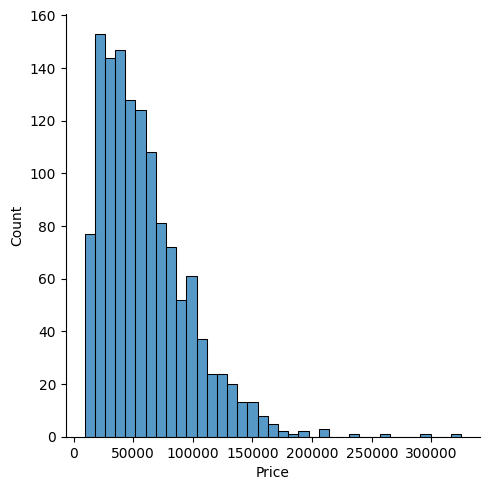

In [341]:
#show the price data
sns.displot(df['Price'])

<Axes: >

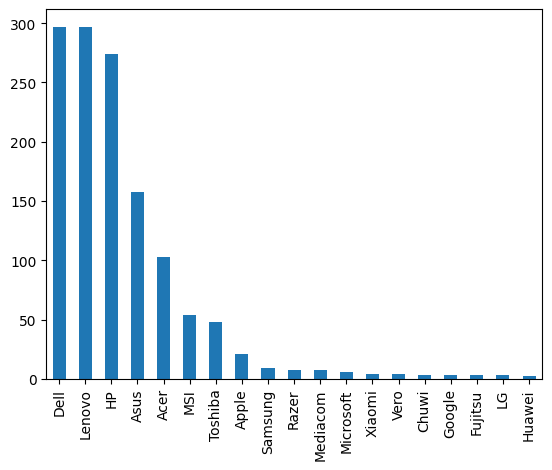

In [342]:
#show how many  laptops for each company
df['Company'].value_counts().plot(kind = 'bar')

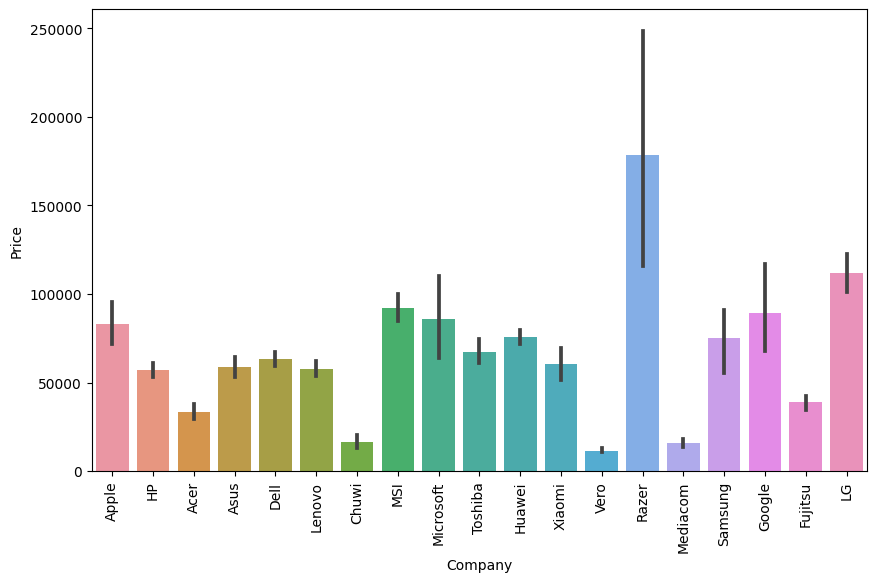

In [343]:
# Create a bar plot to display the price of each company
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x='Company', y='Price', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()


<Axes: >

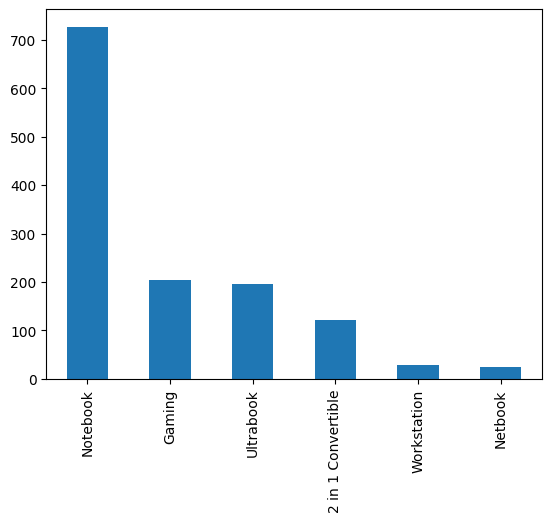

In [344]:
df['TypeName'].value_counts().plot(kind = 'bar')

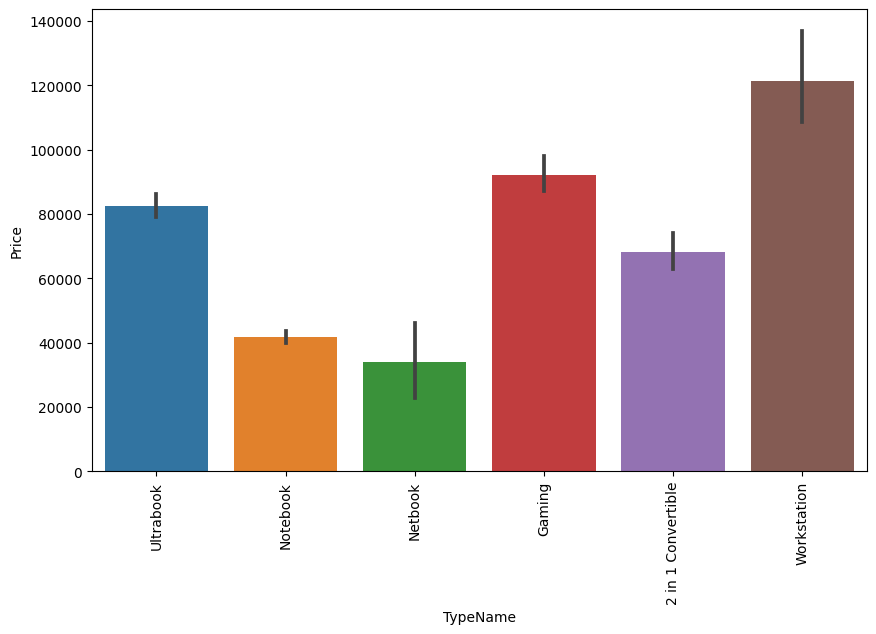

In [345]:
# Create a bar plot to display the price of each type
plt.figure(figsize=(10, 6))
sns.barplot(x='TypeName', y='Price', data=df)
plt.xticks(rotation=90)

# Show the plot
plt.show()

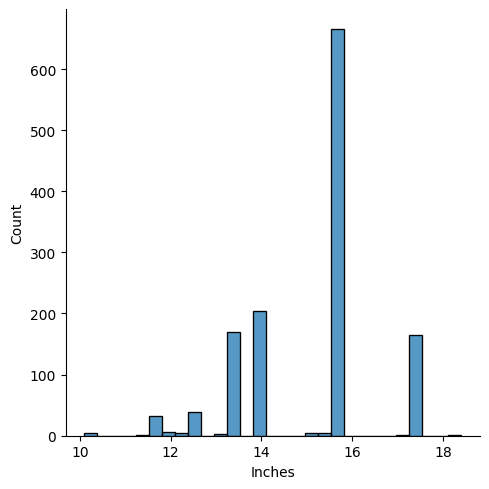

In [346]:
sns.displot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

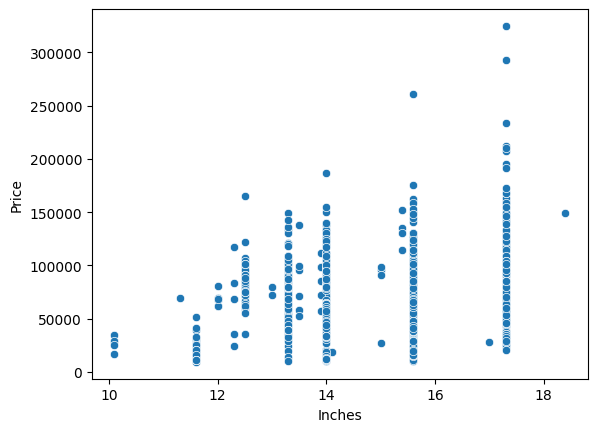

In [347]:
#find out the relation between inches and price column
sns.scatterplot(x=df['Inches'], y = df['Price'])

In [348]:
#find out how many types in the screen resolution column
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [349]:
#find out how many rows have touchscreen in screenresolution column
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [350]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
781,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.30,125208.00,0
1143,HP,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia Quadro M1000M,Windows 7,2.59,118761.12,0
931,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.26,84129.12,0
1153,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050Ti,Windows 10,2.62,63882.72,0
833,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.70,63190.08,0


<Axes: >

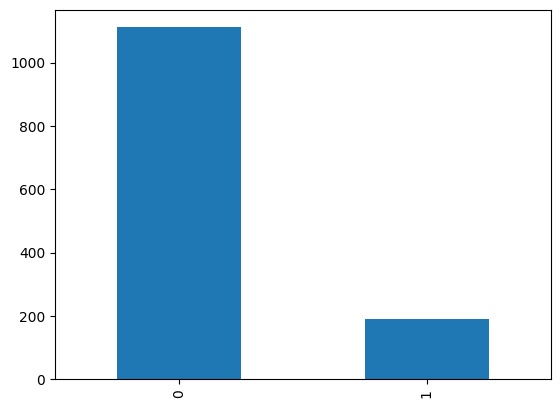

In [351]:
#find out how many rows has touchscreen 1 = touchscreen
df['Touchscreen'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

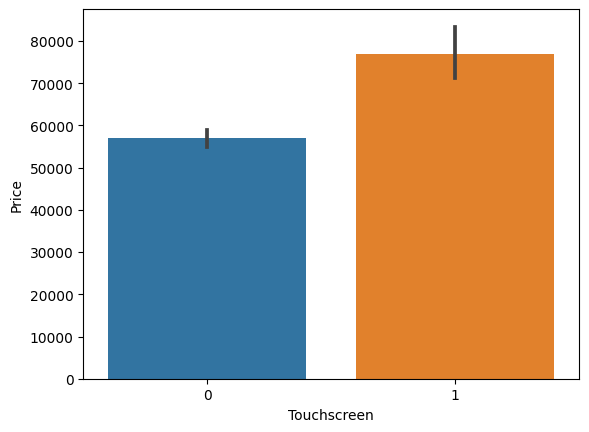

In [352]:
#price and touchscreen relation
sns.barplot(x = df['Touchscreen'], y = df['Price'])

In [353]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [354]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: >

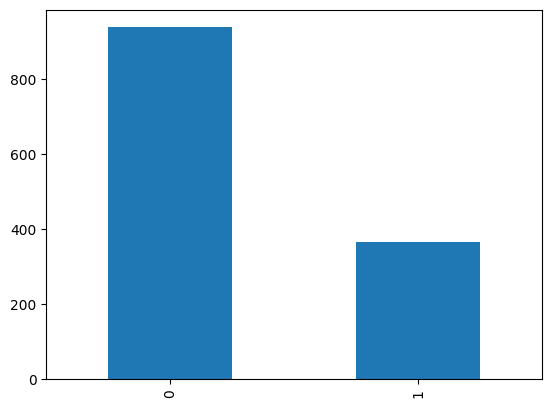

In [355]:
#find out how many laptops has ips
df['Ips'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Ips', ylabel='Price'>

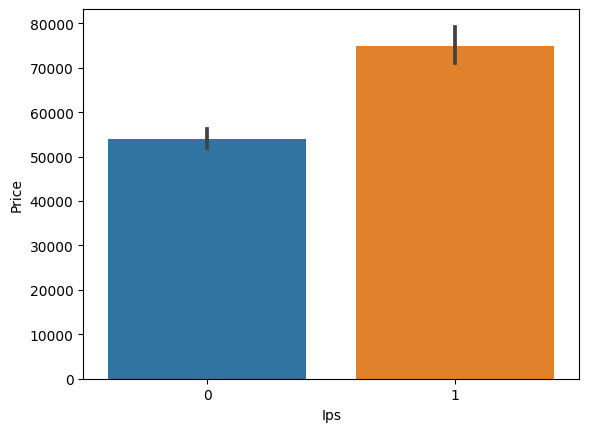

In [356]:
#price and Ips relation
sns.barplot(x = df['Ips'], y = df['Price'])

In [357]:
#seperate x and y in screenresolution
new = df['ScreenResolution'].str.split('x', n = 1, expand = True)

In [358]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [359]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [360]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [361]:
#convert the dataframe from obj to int
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [362]:
#find out the relation between price and other columns
df.corr()['Price']

<ipython-input-362-65adc2e70c96>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [363]:
#make new column ppi
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [364]:
df.corr()['Price']

<ipython-input-364-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [365]:
# Assuming you want to drop the 'ScreenResolution' column from your DataFrame 'df'
df.drop(columns=['ScreenResolution'], inplace=True)


In [366]:
#drop Inches, X_res, Y_res columns
df.drop(columns = ['Inches', 'X_res', 'Y_res'], inplace = True)

In [367]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [368]:
#find out different kinds of row in Cpu column
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [369]:
#extract first three words and convert it into string from list
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [370]:
#find out interl, amd processor with their category
def fetch_processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  else:
    if text.split()[0] == 'Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'

In [371]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [372]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: >

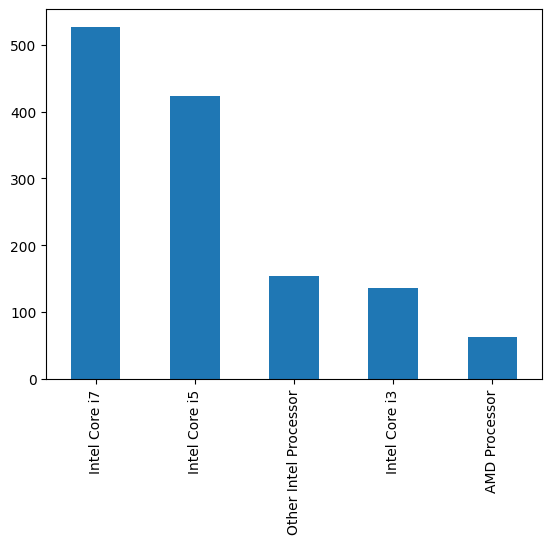

In [373]:
#find out maximum and minimum category cpu
df['Cpu brand'].value_counts().plot(kind = 'bar')

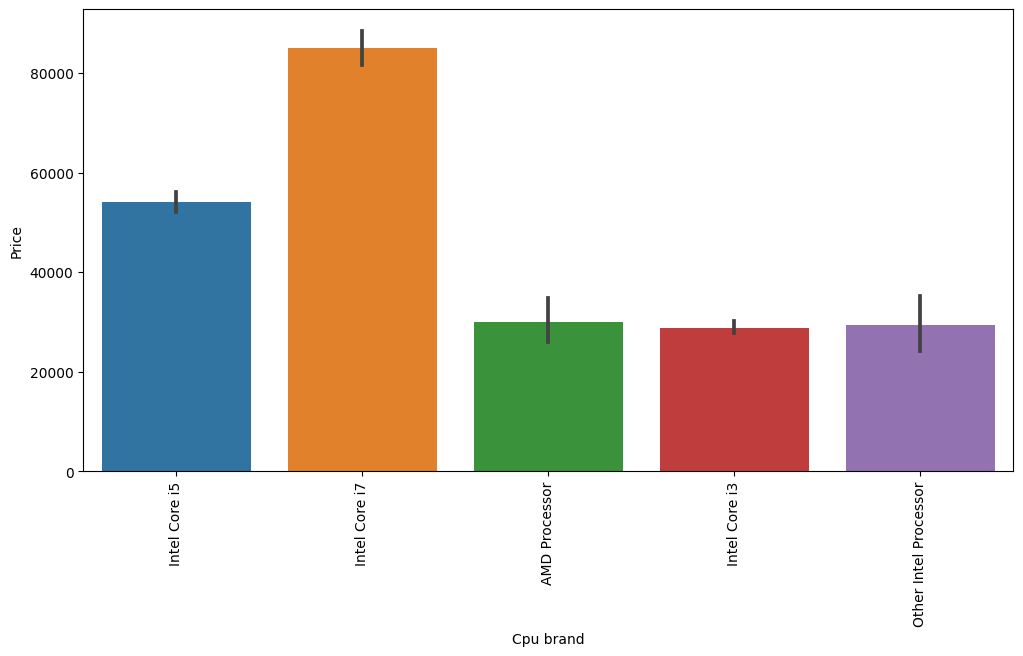

In [374]:
# Create a bar plot to show the relationship between CPU brands and prices
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.barplot(x='Cpu brand', y='Price', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

In [375]:
#drop 2 columns
df.drop(columns = ['Cpu', 'Cpu Name'], inplace = True)

In [376]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: >

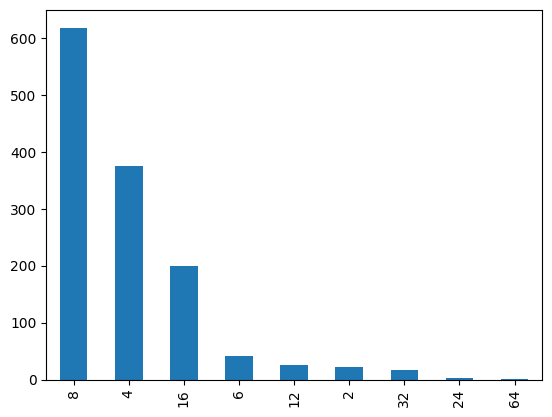

In [377]:
df['Ram'].value_counts().plot(kind = 'bar')

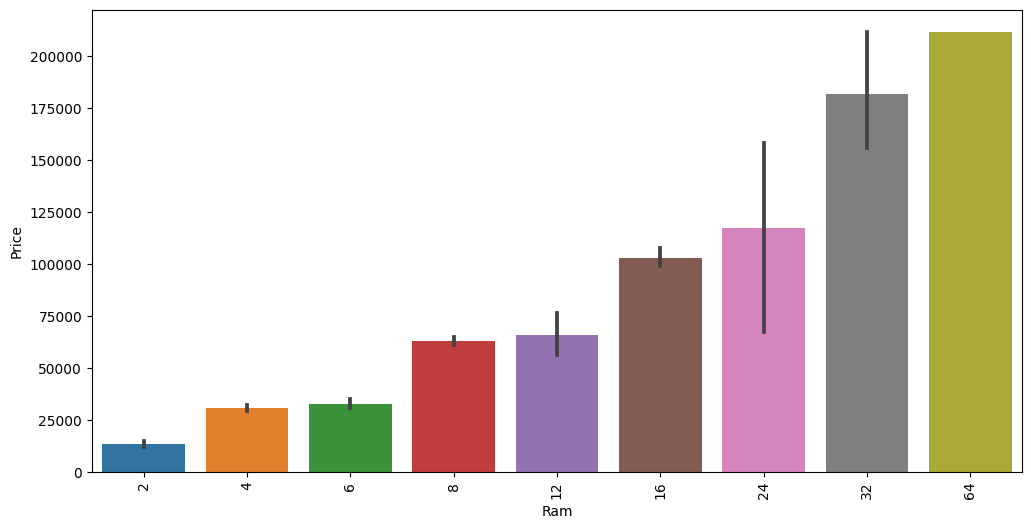

In [378]:
# Create a bar plot to show the relationship between ram and prices
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.barplot(x='Ram', y='Price', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

In [379]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [380]:
# Convert the 'Memory' column to a string and remove any trailing `.0` characters.
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

# Remove the 'GB' and 'TB' units from the 'Memory' column.
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

# Split the 'Memory' column into two columns, separated by the '+' character.
new = df["Memory"].str.split("+", n = 1, expand = True)

# Assign the first column to the 'first' column and strip the whitespace from each value.
df["first"]= new[0]
df["first"]=df["first"].str.strip()

# Assign the second column to the 'second' column.
df["second"]= new[1]

# Create four new columns to indicate the presence of HDD, SSD, Hybrid, and Flash Storage in the 'first' and 'second' columns.
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove all non-digit characters from the 'first' column.
df['first'] = df['first'].str.replace(r'\D', '')

# Fill in any missing values in the 'second' column with the value "0".
df["second"].fillna("0", inplace = True)

# Create four new columns to indicate the presence of HDD, SSD, Hybrid, and Flash Storage in the 'second' column.
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove all non-digit characters from the 'second' column.
df['second'] = df['second'].str.replace(r'\D', '')

# Convert the 'first' and 'second' columns to integers.
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

# Calculate the total HDD, SSD, Hybrid, and Flash Storage capacity for each row.
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

# Drop the 'first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
# 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', and
# 'Layer2Flash_Storage' columns.
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<ipython-input-380-e70e539aa11e>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
<ipython-input-380-e70e539aa11e>:37: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [381]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [382]:
#drop memory columns

df.drop(columns = ['Memory'], inplace = True)

In [383]:
#find out the relations
df.corr()['Price']

<ipython-input-383-b715e4d7e572>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [384]:
#drop columns
df.drop(columns = ['Hybrid', 'Flash_Storage'], inplace = True)

In [385]:
#target Gpu columns
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [386]:
#extract brand name only
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [387]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [390]:
# Remove rows with 'Gpu Brand' equal to 'ARM'
df = df[df['Gpu Brand'] != 'ARM']

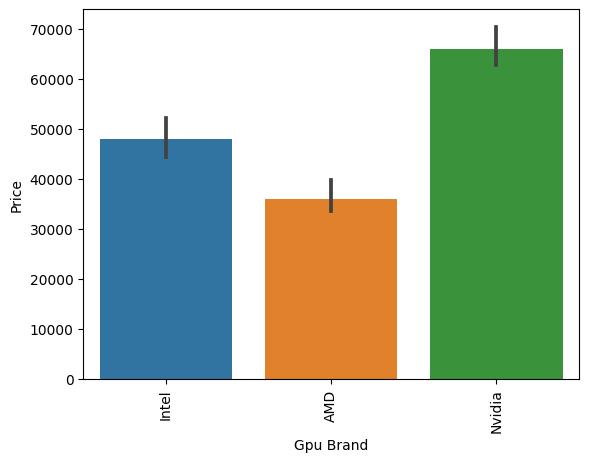

In [392]:
sns.barplot(x=df['Gpu Brand'], y=df['Price'], estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [393]:
df.drop(columns = ['Gpu'], inplace = True)

In [394]:
#target OpSys column
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

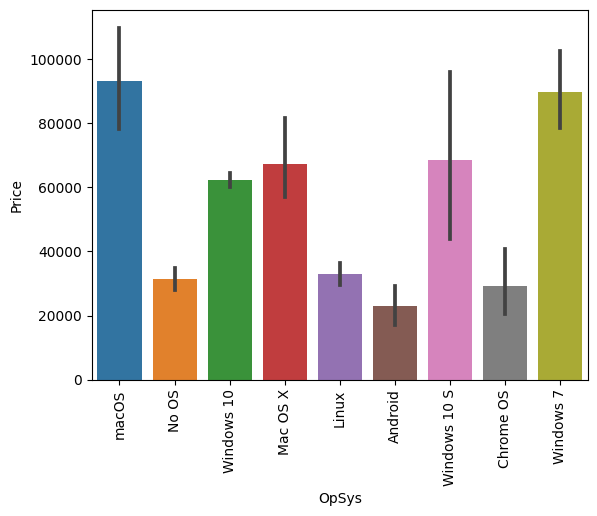

In [396]:
sns.barplot(x = df['OpSys'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [397]:
# Define a function to categorize operating systems
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'


In [398]:
df['os'] = df['OpSys'].apply(cat_os)

In [399]:
df.drop(columns = ['OpSys'], inplace = True)

In [400]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


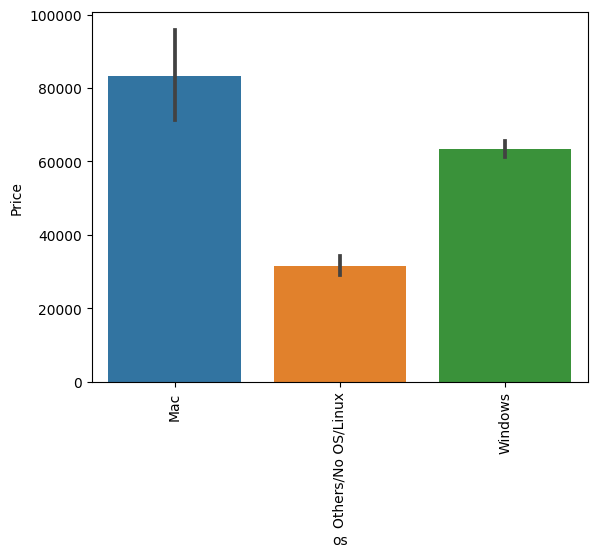

In [401]:
sns.barplot(x = df['os'], y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

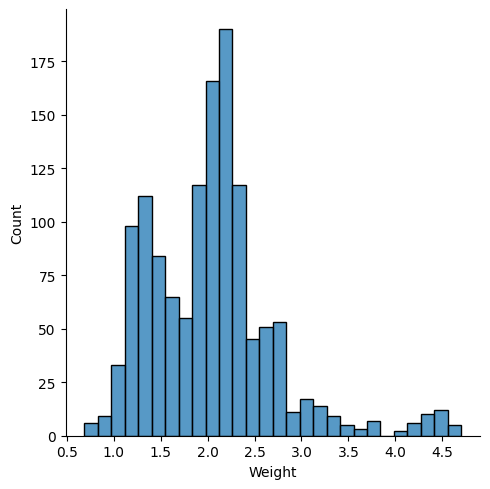

In [402]:
#target Weight
sns.displot(df['Weight'])

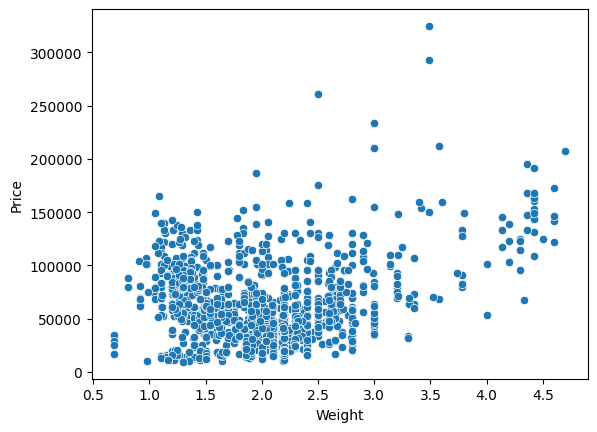

In [404]:
sns.scatterplot(x=df['Weight'], y=df['Price'])
plt.show()

In [405]:
df.corr()['Price']

<ipython-input-405-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<ipython-input-406-1ab3057ef706>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

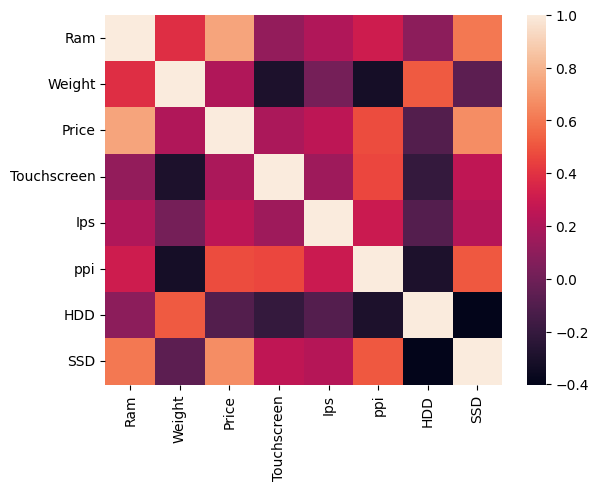

In [406]:
#find out the corelation with other column
sns.heatmap(df.corr())

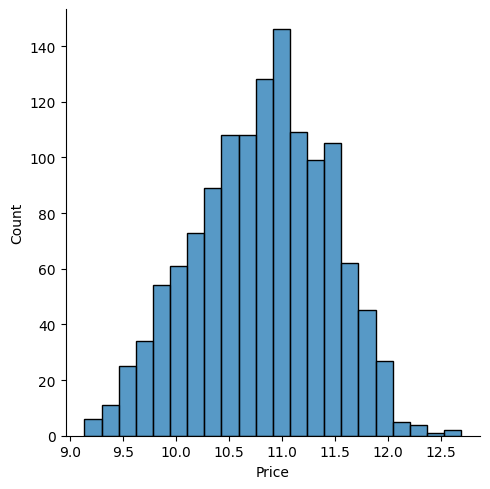

In [408]:
sns.displot(np.log(df['Price']))

In [409]:
X = df.drop(columns = ['Price'])
y = np.log(df['Price'])

In [410]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [411]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [412]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [413]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
91,Acer,Notebook,8,2.20,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows
863,Lenovo,Gaming,8,2.50,0,1,141.211998,Intel Core i5,1000,0,Nvidia,Others/No OS/Linux
552,Dell,Gaming,16,4.42,0,1,127.335675,Intel Core i7,1000,256,Nvidia,Windows
967,HP,Notebook,4,2.04,0,0,141.211998,Intel Core i3,500,0,Intel,Windows
365,HP,Notebook,8,2.04,0,0,100.454670,Other Intel Processor,2000,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [420]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [415]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# **Linea Regression**

In [423]:
# Specify the categorical columns you want to transform
categorical_columns = [0, 1, 7, 10, 11]  # Replace with the column indices you want to treat as categorical

# Create a ColumnTransformer with OneHotEncoder for categorical columns
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_columns)
    ],
    remainder='passthrough'  # You can choose how to handle non-categorical columns
)

# Create a LinearRegression model
step2 = LinearRegression()

# Create a Pipeline that applies the ColumnTransformer and then the LinearRegression model
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on your training data
pipe.fit(X_train, y_train)

# Make predictions on your test data
y_pred = pipe.predict(X_test)

# Calculate and print evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8002405966123032
MAE: 0.20453995815619838


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Ridge Regression**

In [424]:
# Specify the categorical columns you want to transform
categorical_columns = [0, 1, 7, 10, 11]  # Replace with the column indices you want to treat as categorical

# Create a ColumnTransformer with OneHotEncoder for categorical columns
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_columns)
    ],
    remainder='passthrough'  # You can choose how to handle non-categorical columns
)

# Create a LinearRegression model
step2 = Ridge(alpha = 10)

# Create a Pipeline that applies the ColumnTransformer and then the LinearRegression model
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on your training data
pipe.fit(X_train, y_train)

# Make predictions on your test data
y_pred = pipe.predict(X_test)

# Calculate and print evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8025355126649508
MAE: 0.2037972433381517


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Lasso Regression**

In [425]:
# Specify the categorical columns you want to transform
categorical_columns = [0, 1, 7, 10, 11]  # Replace with the column indices you want to treat as categorical

# Create a ColumnTransformer with OneHotEncoder for categorical columns
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_columns)
    ],
    remainder='passthrough'  # You can choose how to handle non-categorical columns
)

# Create a LinearRegression model
step2 = Lasso(alpha = 0.001)

# Create a Pipeline that applies the ColumnTransformer and then the LinearRegression model
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on your training data
pipe.fit(X_train, y_train)

# Make predictions on your test data
y_pred = pipe.predict(X_test)

# Calculate and print evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.7980036909700868
MAE: 0.2060403823639508


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## **KNN**

In [426]:
# Specify the categorical columns you want to transform
categorical_columns = [0, 1, 7, 10, 11]  # Replace with the column indices you want to treat as categorical

# Create a ColumnTransformer with OneHotEncoder for categorical columns
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_columns)
    ],
    remainder='passthrough'  # You can choose how to handle non-categorical columns
)

# Create a LinearRegression model
step2 = KNeighborsRegressor(n_neighbors = 3)

# Create a Pipeline that applies the ColumnTransformer and then the LinearRegression model
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on your training data
pipe.fit(X_train, y_train)

# Make predictions on your test data
y_pred = pipe.predict(X_test)

# Calculate and print evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.7887457126932833
MAE: 0.1965095677955422


# **Decision Tree**

In [427]:
# Specify the categorical columns you want to transform
categorical_columns = [0, 1, 7, 10, 11]  # Replace with the column indices you want to treat as categorical

# Create a ColumnTransformer with OneHotEncoder for categorical columns
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_columns)
    ],
    remainder='passthrough'  # You can choose how to handle non-categorical columns
)

# Create a LinearRegression model
step2 = DecisionTreeRegressor(max_depth = 8)

# Create a Pipeline that applies the ColumnTransformer and then the LinearRegression model
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on your training data
pipe.fit(X_train, y_train)

# Make predictions on your test data
y_pred = pipe.predict(X_test)

# Calculate and print evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8084111777738732
MAE: 0.1966321530077872


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **SVM**

In [428]:
# Specify the categorical columns you want to transform
categorical_columns = [0, 1, 7, 10, 11]  # Replace with the column indices you want to treat as categorical

# Create a ColumnTransformer with OneHotEncoder for categorical columns
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_columns)
    ],
    remainder='passthrough'  # You can choose how to handle non-categorical columns
)

# Create a LinearRegression model
step2 = SVR(kernel = 'rbf', C = 10000, epsilon = 0.1)

# Create a Pipeline that applies the ColumnTransformer and then the LinearRegression model
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on your training data
pipe.fit(X_train, y_train)

# Make predictions on your test data
y_pred = pipe.predict(X_test)

# Calculate and print evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.7767571730277032
MAE: 0.2037235023910893


# **Random Forest**

In [429]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8618952788875983
MAE 0.16682948232961559


# **Extra Trees**

In [431]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

# Specify the categorical columns you want to transform
categorical_columns = [0, 1, 7, 10, 11]  # Replace with the column indices you want to treat as categorical

# Create a ColumnTransformer with OneHotEncoder for categorical columns
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_columns)
    ],
    remainder='passthrough'  # You can choose how to handle non-categorical columns
)

# Create an ExtraTreesRegressor model
step2 = ExtraTreesRegressor(n_estimators=100, random_state=3, max_features=0.75, max_depth=15)

# Create a Pipeline that applies the ColumnTransformer and then the ExtraTreesRegressor model
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on your training data
pipe.fit(X_train, y_train)

# Make predictions on your test data
y_pred = pipe.predict(X_test)

# Calculate and print evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.8524390593890102
MAE: 0.16551552329230926


# **Ada Boost**

In [432]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7904310444424155
MAE 0.22165197507371123


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Gradient Boost**

In [433]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8632667500680719
MAE 0.16358264515798313


# **XgBoost**

In [434]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8533066956579289
MAE 0.16916476273326114


# **Voting Regressor**

In [436]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

# Specify the categorical columns you want to transform
categorical_columns = [0, 1, 7, 10, 11]  # Replace with the column indices you want to treat as categorical

# Create a ColumnTransformer with OneHotEncoder for categorical columns
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_columns)
    ],
    remainder='passthrough'  # You can choose how to handle non-categorical columns
)

# Create individual regression models
rf = RandomForestRegressor(n_estimators=350, random_state=3, max_features=0.75, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
xgb = XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5)
et = ExtraTreesRegressor(n_estimators=100, random_state=3, max_features=0.75, max_depth=10)

# Create a VotingRegressor with specified models and weights
step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb', xgb), ('et', et)], weights=[5, 1, 1, 1])

# Create a Pipeline that applies the ColumnTransformer and then the VotingRegressor model
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on your training data
pipe.fit(X_train, y_train)

# Make predictions on your test data
y_pred = pipe.predict(X_test)

# Calculate and print evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.8750918324772715
MAE: 0.15920621077639424


# **Stacking**

In [437]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8714610724923397
MAE 0.16306508697835356


# **Exporting the Model**

In [438]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))